# Fetch MNIST dataset

In [2]:
from sklearn.datasets import fetch_mldata
try:
    mnist = fetch_mldata('MNIST original')
except Exception as ex:        
    from six.moves import urllib
    from scipy.io import loadmat
    import os

    #mnist_path = os.path.join(".", "datasets", "mnist-original.mat")
    mnist_path = "~/Documents/handsonml/handson-ml/Ch3_Classification_Code_along/datasets/mnist-original.mat"
    # download dataset from github.
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    #if not os.path.exists(mnist_path):
     #   os.makedirs(mnist_path)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)

    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Done!")

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

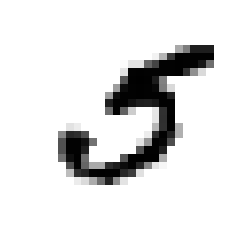

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
        interpolation="nearest")
plt.axis('off')
plt.show()

In [11]:
y[36000]

5.0

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Keeping it simple, we'll first train a binary classifier for the digit 5

In [15]:
y_train_5 = (y_train == 5) #Boolean mapping of 5 or not 5
y_test_5 = (y_test == 5)

In [25]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_5)

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [26]:
sgd_clf.predict([some_digit])

array([ True])

## Measuring Accuracy using Cross Validation

In [33]:
from sklearn.model_selection import StratifiedKFold
import copy
#Stratified splitting handles datasets that are skewed in class
#proportionality. It maintians roughly the same ratios of classes
#in each split

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = copy.deepcopy(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = np.sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9654
0.96215
0.96485


Not bad, lets test it with cross_val_score() from sklearn

In [34]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

array([0.95405, 0.9599 , 0.95075])

Think it's good? Let's make a classifier that never selects 5

In [35]:
from sklearn.base import BaseEstimator
#When used in inheritance, BaseEstimator gives get_param() and set_param()

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [36]:
never_5_clf = Never5Classifier()

cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring = "accuracy")

array([0.90885, 0.91155, 0.90855])

### Accuracy is a poor metric of evaluation. Instead, use confusion matrix

In [37]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

In [38]:
y_train_pred.shape

(60000,)

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53712,   867],
       [ 1527,  3894]])

### Precision and Recall

Precision: TP/(TP + FP)
Recall: TP/(TP + FN)

In [40]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8178954001260239

In [41]:
recall_score(y_train_5, y_train_pred)

0.7183176535694521

The "F1-Score" is a metric that combines precision and recall, giving lower scores a greater weight. In order for F1 score to be high, both precision and recall needs to be high. A.K.A. "Harmonic Mean", useful for comparing different models.

In [42]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7648791985857395

Precision and Recall Trade off

In the case of a binary classifier, increasing threshold (moving towards the right side in Figure 3-3) increases precision but reduces recall.

Decreasing threshold increases recall but reduces precision.

Scikitlearn's predictors don't allow you to change threshold but it can return decision scores. That score can be used to make decision based on any theshold you want.

In [43]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([101630.64148415])

In [45]:
threshold = 0

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [46]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [48]:
#Using cross val scores again but specifying we want decision scores
#instead of predictions

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

In [49]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
# Always labels first, then prediction scores

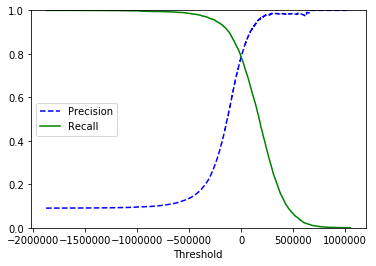

In [52]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    plt.show()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [53]:
y_train_pred_90 = (y_scores > 70000)

In [55]:
precision_score(y_train_5, y_train_pred_90)

0.8819461006439303

In [56]:
recall_score(y_train_5, y_train_pred_90)

0.6821619627375023

# The ROC Curve

Receiver Operating Characteristic curve

In [57]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


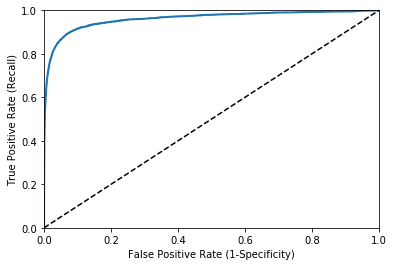

In [67]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate (1-Specificity)")
    plt.ylabel("True Positive Rate (Recall)")
    
plot_roc_curve(fpr,tpr)

TPR vs FPR tradeoff.

Dotted line is a random classifier, good classifiers produce a ROC that is far away from the dotted line.

Area under the ROC curve measures the quality of a classifier. 1 = Perfect, 0.5 = Random

In [68]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9613842347682978

# ROC on a Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,cv=3,
                                   method="predict_proba")

In [70]:
y_probas_forest
#Unlike decision_function for SGDClassifier, random forest only has 
#"predict_proba" function. This returns a row for each training example,
#And a column for each class containing probability of that class.

array([[0.9, 0.1],
       [0. , 1. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [71]:
#To plot ROC, we'll need scores not probabilities. Just use the 'True'
#values as scores
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,
                                                     y_scores_forest)

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/matplotlib/legend.py:493: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	upper right
	center
	center left
	lower center
	lower right
	upper left
	center right
	upper center
	right
	best
	lower left

  % (loc, '\n\t'.join(self.codes)))


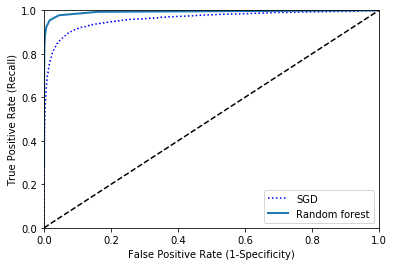

In [72]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random forest")
plt.legend(loc = "lower_right")

In [73]:
roc_auc_score(y_train_5, y_scores_forest)

0.9929813748078107

In [74]:
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5,cv=3,
                                   method="predict")
precision_score(y_train_5, y_pred_forest)

0.9890542907180385

In [75]:
recall_score(y_train_5, y_pred_forest)

0.8334255672385169

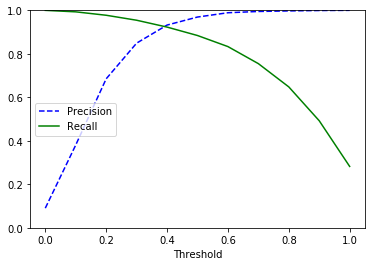

In [76]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_forest)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)